### Chicago Taxi - Data Analysis and Visualization

The taxi data for Chicago was downloaded from https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew into csv format. The data was initially downloaded on 11/20/2016. This dataset has rides starting in 2013 till the last month (depending on when you download the data). I downloaded the data again in January and then February. At that point of time, the last update was on 02/10/2017. The total size of the csv file now is 8.28 GB and I filtered the data from Jan 1, 2016 onwards. The complete file size is larger than 30 GB! 

I currently live in Chicago and am a data analysis and visualization enthusiast and professional. Hence wanted to see what the **taxi data** of Chicago for the year 2016 can tell us about our city. Now the complete 2016 taxi data is available.  

We use the following python libraries for this exercise:
* pandas
* matplotlib
* numpy
* seaborn
* geopandas (almost at the end of the codes)

We also use Jupyter Notebook for an interactive code writing environment.

The very first line of the code reads `%matplotlib inline`. Use this to plot the graphs and maps on the Notebook itself.  
The next few lines of the codes are the import library functions which have been mentioned above.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Read the downloaded csv file as a dataframe. `df.head()` shows the top 5 rows of the file. `df.tail()` on the other hand will show the last 5 rows. We can use any number we want within `()` and those many number of rows will be shown as output. We can also use `df.iloc[:n]` where n is the number of rows we want from the first row of the dataframe.

In [2]:
df = pd.read_csv("~/Projects/Personal/Taxi_Trips.csv",sep=',')
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,1783ba48ccff321d88e39a0bc3b7af8bd6cbbfcb,ad87bd954307e44d386e9f1fe87afb426ca69eb3cb1af5...,09/15/2016 07:00:00 PM,09/15/2016 07:15:00 PM,1080.0,1.2,1.703108e+10,1.703108e+10,8.0,8.0,...,$0.00,$11.75,Credit Card,Taxi Affiliation Services,41.892042,-87.631864,POINT (-87.631864 41.892042),41.890922,-87.618868,POINT (-87.618868 41.890922)
1,1783baf449809b3f09a9395ab7e8aee9ec24fa7d,c3ebfce9cb4f64d18d29e3e416e9f64dfe671eb8226d44...,04/20/2016 10:00:00 AM,04/20/2016 10:00:00 AM,600.0,0.0,1.703108e+10,1.703132e+10,8.0,32.0,...,$0.00,$8.00,Cash,Taxi Affiliation Services,41.902788,-87.626146,POINT (-87.626146 41.902788),41.884987,-87.620993,POINT (-87.620993 41.884987)
2,1783bc7cd25debec6da5ee109113f90f61971fdc,ff214d6d48867d32b43c8caf27613acc83d3a03a290c37...,07/23/2016 03:30:00 AM,07/23/2016 03:45:00 AM,780.0,2.8,NaN,NaN,7.0,8.0,...,$2.50,$17.55,Credit Card,Taxi Affiliation Services,41.922686,-87.649489,POINT (-87.649489 41.922686),41.899602,-87.633308,POINT (-87.633308 41.899602)
3,1783bec00cc13944a77618d0e25b4a5965b8cd7a,1ed802e8138d030626cb7276ceadd721c743526af747ac...,01/19/2016 09:45:00 AM,01/19/2016 09:45:00 AM,0.0,0.0,NaN,NaN,NaN,NaN,...,$0.00,$13.50,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,NaN,NaN,NaN,NaN
4,1783bef4e4306399576ef6fd017e23b67cd7d962,5df3cbdbc39613ccc8f088f0890a38758bb449ffc7b882...,01/20/2016 03:45:00 PM,01/20/2016 04:00:00 PM,300.0,0.9,1.703132e+10,1.703108e+10,32.0,8.0,...,$2.00,$9.25,Credit Card,Dispatch Taxi Affiliation,41.884987,-87.620993,POINT (-87.620993 41.884987),41.892042,-87.631864,POINT (-87.631864 41.892042)


As can be seen from the table above, a part of the column names between Dropoff Community Area and Trip Total is represented by `...` (ellipsis). In order to see all the column (header) names, use `list(df)`.

In [3]:
list(df) #This shows all the column names (headers)

['Trip ID',
 'Taxi ID',
 'Trip Start Timestamp',
 'Trip End Timestamp',
 'Trip Seconds',
 'Trip Miles',
 'Pickup Census Tract',
 'Dropoff Census Tract',
 'Pickup Community Area',
 'Dropoff Community Area',
 'Fare',
 'Tips',
 'Tolls',
 'Extras',
 'Trip Total',
 'Payment Type',
 'Company',
 'Pickup Centroid Latitude',
 'Pickup Centroid Longitude',
 'Pickup Centroid Location',
 'Dropoff Centroid Latitude',
 'Dropoff Centroid Longitude',
 'Dropoff Centroid  Location']

`describe()` provides the basic statistics of the dataframe as can be seen below. This includes:
* count (Total number of observations for each column)
* mean
* std (Standard Deviation)
* min (Minimum Value)
* 25% (25th percentile)
* 50% (50th percentile)
* 75% (75th percentile)
* max (Maximum Value)

We are using this function here to see what the initial statistics on the uncleaned data looks like before proceeding. We can already see that the counts for each column vary tremendously. That is because some of the rows have null values and hence count has ignored them.

In [4]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,2.091451e+07,2.091756e+07,1.281343e+07,1.276168e+07,1.806381e+07,1.771362e+07,1.806419e+07,1.806419e+07,1.775321e+07,1.775321e+07
mean,7.645104e+02,3.373055e+00,1.703138e+10,1.703137e+10,2.371551e+01,2.174159e+01,4.190084e+01,-8.765910e+01,4.190088e+01,-8.765366e+01
std,1.062758e+03,2.206898e+01,3.445317e+05,3.360650e+05,1.998333e+01,1.778995e+01,3.772207e-02,7.359626e-02,3.777557e-02,5.886868e-02
min,0.000000e+00,0.000000e+00,1.703101e+10,1.703101e+10,1.000000e+00,1.000000e+00,4.166014e+01,-8.791362e+01,4.166014e+01,-8.791362e+01
25%,3.000000e+02,1.000000e-01,1.703108e+10,1.703108e+10,8.000000e+00,8.000000e+00,4.188099e+01,-8.765588e+01,4.188099e+01,-8.765600e+01
50%,5.400000e+02,1.100000e+00,1.703128e+10,1.703128e+10,2.400000e+01,2.200000e+01,4.189207e+01,-8.763275e+01,4.189251e+01,-8.763275e+01
75%,9.000000e+02,2.700000e+00,1.703184e+10,1.703183e+10,3.200000e+01,3.200000e+01,4.190586e+01,-8.762615e+01,4.191462e+01,-8.762621e+01
max,8.639900e+04,3.353100e+03,1.703198e+10,1.703198e+10,7.700000e+01,7.700000e+01,4.202122e+01,-8.753490e+01,4.202122e+01,-8.753490e+01


We will remove the columns 'Pickup Census Tract' and 'Dropoff Census Tract' since the Taxi Data states that 
> Census Tracts are suppressed in some cases.

Thus we will use `df.drop` and `df.columns` together to drop these columns. `axis=1` refers to columns and `axis=0` refers to rows. And the first column 'Trip ID' is the 0th column. Hence we drop column 6 and 7.

In [5]:
df.drop(df.columns[[6,7]], axis=1, inplace=True)
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,1783ba48ccff321d88e39a0bc3b7af8bd6cbbfcb,ad87bd954307e44d386e9f1fe87afb426ca69eb3cb1af5...,09/15/2016 07:00:00 PM,09/15/2016 07:15:00 PM,1080.0,1.2,8.0,8.0,$9.75,$2.00,...,$0.00,$11.75,Credit Card,Taxi Affiliation Services,41.892042,-87.631864,POINT (-87.631864 41.892042),41.890922,-87.618868,POINT (-87.618868 41.890922)
1,1783baf449809b3f09a9395ab7e8aee9ec24fa7d,c3ebfce9cb4f64d18d29e3e416e9f64dfe671eb8226d44...,04/20/2016 10:00:00 AM,04/20/2016 10:00:00 AM,600.0,0.0,8.0,32.0,$8.00,$0.00,...,$0.00,$8.00,Cash,Taxi Affiliation Services,41.902788,-87.626146,POINT (-87.626146 41.902788),41.884987,-87.620993,POINT (-87.620993 41.884987)
2,1783bc7cd25debec6da5ee109113f90f61971fdc,ff214d6d48867d32b43c8caf27613acc83d3a03a290c37...,07/23/2016 03:30:00 AM,07/23/2016 03:45:00 AM,780.0,2.8,7.0,8.0,$11.00,$4.05,...,$2.50,$17.55,Credit Card,Taxi Affiliation Services,41.922686,-87.649489,POINT (-87.649489 41.922686),41.899602,-87.633308,POINT (-87.633308 41.899602)
3,1783bec00cc13944a77618d0e25b4a5965b8cd7a,1ed802e8138d030626cb7276ceadd721c743526af747ac...,01/19/2016 09:45:00 AM,01/19/2016 09:45:00 AM,0.0,0.0,NaN,NaN,$11.25,$2.25,...,$0.00,$13.50,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,NaN,NaN,NaN,NaN
4,1783bef4e4306399576ef6fd017e23b67cd7d962,5df3cbdbc39613ccc8f088f0890a38758bb449ffc7b882...,01/20/2016 03:45:00 PM,01/20/2016 04:00:00 PM,300.0,0.9,32.0,8.0,$5.75,$1.50,...,$2.00,$9.25,Credit Card,Dispatch Taxi Affiliation,41.884987,-87.620993,POINT (-87.620993 41.884987),41.892042,-87.631864,POINT (-87.631864 41.892042)


In [6]:
list(df)

['Trip ID',
 'Taxi ID',
 'Trip Start Timestamp',
 'Trip End Timestamp',
 'Trip Seconds',
 'Trip Miles',
 'Pickup Community Area',
 'Dropoff Community Area',
 'Fare',
 'Tips',
 'Tolls',
 'Extras',
 'Trip Total',
 'Payment Type',
 'Company',
 'Pickup Centroid Latitude',
 'Pickup Centroid Longitude',
 'Pickup Centroid Location',
 'Dropoff Centroid Latitude',
 'Dropoff Centroid Longitude',
 'Dropoff Centroid  Location']

As stated above, this dataframe contains Nan (Not a Number) - basically Null values. To clean such rows, we will use `df.dropna()`. 

In [7]:
df.dropna(how='any', inplace=True)

In [8]:
pd.options.mode.chained_assignment = None

When we import a dataset into pandas, it creates an index field. You can set the index field to a relevant column, if possible, as done below. In this case Trip ID is a unique value for each row as well. 

In [9]:
# df.index
df = df.set_index('Trip ID')

Now that we have filtered the dataframe and set it's index, we start with converting the "Trip Start Timestamp" to a datetime function. We match the format of datetime with the one that can be seen in the very first table above. 

In [10]:
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'], format='%m/%d/%Y %I:%M:%S %p')

Once the "Trip Start Timestamp" has been converted to a datetime format, we create new columns to slice the column by date, year, month, day, hour etc. which we will use later in the analysis.

In [11]:
df['date'] = df['Trip Start Timestamp'].dt.date
df['year'] = df['Trip Start Timestamp'].dt.year
df['month'] = df['Trip Start Timestamp'].dt.month
df['day'] = df['Trip Start Timestamp'].dt.day
df['hour'] = df['Trip Start Timestamp'].dt.hour
df['weekday'] = df['Trip Start Timestamp'].dt.weekday_name
df['weekyr'] = df['Trip Start Timestamp'].dt.weekofyear
df.head()

,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,...,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,date,year,month,day,hour,weekday,weekyr
Trip ID,,,,,,,,,,,,,,,,,,,,,
1783ba48ccff321d88e39a0bc3b7af8bd6cbbfcb,ad87bd954307e44d386e9f1fe87afb426ca69eb3cb1af5...,2016-09-15 19:00:00,09/15/2016 07:15:00 PM,1080.0,1.2,8.0,8.0,$9.75,$2.00,$0.00,...,41.890922,-87.618868,POINT (-87.618868 41.890922),2016-09-15,2016,9,15,19,Thursday,37
1783baf449809b3f09a9395ab7e8aee9ec24fa7d,c3ebfce9cb4f64d18d29e3e416e9f64dfe671eb8226d44...,2016-04-20 10:00:00,04/20/2016 10:00:00 AM,600.0,0.0,8.0,32.0,$8.00,$0.00,$0.00,...,41.884987,-87.620993,POINT (-87.620993 41.884987),2016-04-20,2016,4,20,10,Wednesday,16
1783bc7cd25debec6da5ee109113f90f61971fdc,ff214d6d48867d32b43c8caf27613acc83d3a03a290c37...,2016-07-23 03:30:00,07/23/2016 03:45:00 AM,780.0,2.8,7.0,8.0,$11.00,$4.05,$0.00,...,41.899602,-87.633308,POINT (-87.633308 41.899602),2016-07-23,2016,7,23,3,Saturday,29
1783bef4e4306399576ef6fd017e23b67cd7d962,5df3cbdbc39613ccc8f088f0890a38758bb449ffc7b882...,2016-01-20 15:45:00,01/20/2016 04:00:00 PM,300.0,0.9,32.0,8.0,$5.75,$1.50,$0.00,...,41.892042,-87.631864,POINT (-87.631864 41.892042),2016-01-20,2016,1,20,15,Wednesday,3
1783c16db08d64368f0599ea1718f6205d7d093c,8a8b7ea6cf38ddad449d266d38a1c10cf326e0e06f3e7c...,2016-09-13 21:30:00,09/13/2016 09:45:00 PM,180.0,0.6,24.0,24.0,$4.75,$0.00,$0.00,...,41.901207,-87.676356,POINT (-87.676356 41.901207),2016-09-13,2016,9,13,21,Tuesday,37


The columns mentioned below are integers as per pandas but we know that these are not so and are unique identifiers for Community Areas. Hence we now convert them to string using `.astype(str)`

In [12]:
df['Pickup Community Area'] = df['Pickup Community Area'].astype(str)
df['Dropoff Community Area'] = df['Dropoff Community Area'].astype(str)
#df['Community Areas'] = df['Community Areas'].astype(str) 
# 'Community Areas' are no longer part of the dataset.

Remove '.0' from Pickup and Dropoff Community Areas using replace function.

In [13]:
df['Pickup Community Area'].replace(regex=True, to_replace='.0',value='', inplace=True)
df['Dropoff Community Area'].replace(regex=True, to_replace='.0',value='', inplace=True)

In [14]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,year,month,day,hour,weekyr
count,1.105489e+07,1.105489e+07,1.105489e+07,1.105489e+07,1.105489e+07,1.105489e+07,1.105489e+07,1.105489e+07,1.105489e+07,1.105489e+07,1.105489e+07
mean,7.675484e+02,2.313957e+00,4.189927e+01,-8.765482e+01,4.190021e+01,-8.765269e+01,2.016045e+03,5.869073e+00,1.563012e+01,1.371427e+01,2.385158e+01
std,7.169576e+02,5.147055e+00,3.656415e-02,6.638071e-02,3.740588e-02,5.698508e-02,2.076480e-01,3.390999e+00,8.700381e+00,6.404375e+00,1.485904e+01
min,0.000000e+00,0.000000e+00,4.166014e+01,-8.791362e+01,4.166014e+01,-8.791362e+01,2.016000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,3.600000e+02,0.000000e+00,4.188099e+01,-8.765197e+01,4.188099e+01,-8.765600e+01,2.016000e+03,3.000000e+00,8.000000e+00,1.000000e+01,1.100000e+01
50%,5.400000e+02,8.000000e-01,4.189207e+01,-8.763275e+01,4.189251e+01,-8.763275e+01,2.016000e+03,6.000000e+00,1.600000e+01,1.500000e+01,2.300000e+01
75%,9.000000e+02,2.000000e+00,4.190279e+01,-8.762615e+01,4.191462e+01,-8.762621e+01,2.016000e+03,9.000000e+00,2.300000e+01,1.900000e+01,3.600000e+01
max,8.004000e+04,9.955000e+02,4.202122e+01,-8.753490e+01,4.202122e+01,-8.753490e+01,2.017000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.300000e+01


The statistics above shows that the maximum Trip Miles is 995 miles! Hence we use histogram to see the frequency distribution of this. As can be seen from the figure, there is really no spike after say, crossing 100. 

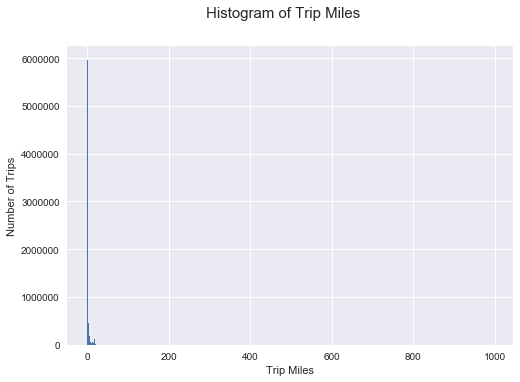

In [15]:
df['Trip Miles'].hist(bins = 1000)
plt.xlabel("Trip Miles")
plt.ylabel("Number of Trips")
plt.suptitle('Histogram of Trip Miles', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

Let's limit the Trip Miles for the above graph to 50 miles. We can now see that after 25 miles, there is really no peak. 

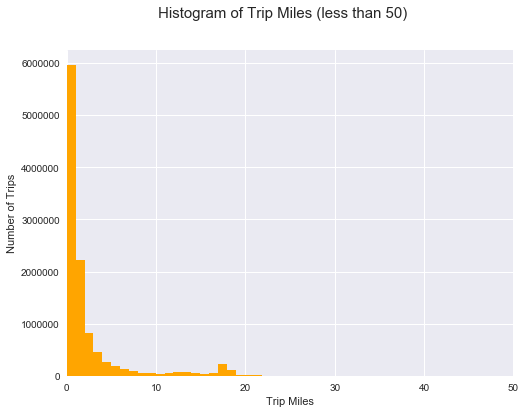

In [16]:
df['Trip Miles'].hist(bins = 1000, color = 'orange')
plt.xlim(0, 50)
plt.xlabel("Trip Miles")
plt.ylabel("Number of Trips")
plt.suptitle('Histogram of Trip Miles (less than 50)', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

We will thus filter the dataset further and use the following parameters:
* year = 2016
* Trip Miles > 0 and <= 40
* Trip Seconds > 0 (excluding if the ride says '0' seconds)

In [17]:
Taxi = df[(df['year'] == 2016) & (df['Trip Miles'] > 0.0) & (df['Trip Miles'] <= 40.0) & (df['Trip Seconds'] > 0.0)]

Note that we changed the name of the filtered dataframe to Taxi.
We further remove the '$' sign from Trip Total, Fare, Tips, Tolls and Extras and convert them to floats. This will help us perform mathematical functions on them. 

In [18]:
Taxi['Trip Total'] = Taxi['Trip Total'].str.replace('$', '').astype(np.float64)
Taxi['Fare'] = Taxi['Fare'].str.replace('$', '').astype(np.float64)
Taxi['Tips'] = Taxi['Tips'].str.replace('$', '').astype(np.float64)
Taxi['Tolls'] = Taxi['Tolls'].str.replace('$', '').astype(np.float64)
Taxi['Extras'] = Taxi['Extras'].str.replace('$', '').astype(np.float64)

Now that we have filtered the data and performed the necessary transformations on the required columns. We can check how the data looks now and then also perform the basic statistical analysis on it.

In [19]:
Taxi.head()

,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,...,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,date,year,month,day,hour,weekday,weekyr
Trip ID,,,,,,,,,,,,,,,,,,,,,
1783ba48ccff321d88e39a0bc3b7af8bd6cbbfcb,ad87bd954307e44d386e9f1fe87afb426ca69eb3cb1af5...,2016-09-15 19:00:00,09/15/2016 07:15:00 PM,1080.0,1.2,8,8,9.75,2.00,0.0,...,41.890922,-87.618868,POINT (-87.618868 41.890922),2016-09-15,2016,9,15,19,Thursday,37
1783bc7cd25debec6da5ee109113f90f61971fdc,ff214d6d48867d32b43c8caf27613acc83d3a03a290c37...,2016-07-23 03:30:00,07/23/2016 03:45:00 AM,780.0,2.8,7,8,11.00,4.05,0.0,...,41.899602,-87.633308,POINT (-87.633308 41.899602),2016-07-23,2016,7,23,3,Saturday,29
1783bef4e4306399576ef6fd017e23b67cd7d962,5df3cbdbc39613ccc8f088f0890a38758bb449ffc7b882...,2016-01-20 15:45:00,01/20/2016 04:00:00 PM,300.0,0.9,32,8,5.75,1.50,0.0,...,41.892042,-87.631864,POINT (-87.631864 41.892042),2016-01-20,2016,1,20,15,Wednesday,3
1783c16db08d64368f0599ea1718f6205d7d093c,8a8b7ea6cf38ddad449d266d38a1c10cf326e0e06f3e7c...,2016-09-13 21:30:00,09/13/2016 09:45:00 PM,180.0,0.6,24,24,4.75,0.00,0.0,...,41.901207,-87.676356,POINT (-87.676356 41.901207),2016-09-13,2016,9,13,21,Tuesday,37
1783c1f4e5ef19c53f22736f6b29db98ddd88186,287fa9bc5736fe53d3630bbea4a6a3ccde9d15b2c32b4c...,2016-05-19 23:00:00,05/19/2016 11:15:00 PM,780.0,1.3,32,32,8.25,0.00,0.0,...,41.880994,-87.632746,POINT (-87.632746 41.880994),2016-05-19,2016,5,19,23,Thursday,20


In [20]:
Taxi.describe()

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,year,month,day,hour,weekyr
count,7.462485e+06,7.462485e+06,7.462485e+06,7.462485e+06,7.462485e+06,7.462485e+06,7.462485e+06,7.462485e+06,7.462485e+06,7.462485e+06,7.462485e+06,7462485.0,7.462485e+06,7.462485e+06,7.462485e+06,7.462485e+06
mean,8.594367e+02,3.245030e+00,1.406220e+01,1.680120e+00,7.413362e-04,8.772082e-01,1.662027e+01,4.189948e+01,-8.765716e+01,4.190062e+01,-8.765413e+01,2016.0,6.117925e+00,1.560095e+01,1.372112e+01,2.485686e+01
std,7.435417e+02,4.770561e+00,1.200275e+01,2.720954e+00,3.702725e-01,2.229061e+01,2.663042e+01,3.743209e-02,7.005577e-02,3.818901e-02,5.870784e-02,0.0,3.288225e+00,8.695395e+00,6.452802e+00,1.440373e+01
min,6.000000e+01,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.166014e+01,-8.791362e+01,4.166014e+01,-8.791362e+01,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,4.200000e+02,7.000000e-01,6.750000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,4.188099e+01,-8.765588e+01,4.188099e+01,-8.765600e+01,2016.0,3.000000e+00,8.000000e+00,1.000000e+01,1.300000e+01
50%,6.600000e+02,1.300000e+00,9.250000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.075000e+01,4.189207e+01,-8.763275e+01,4.189251e+01,-8.763331e+01,2016.0,6.000000e+00,1.600000e+01,1.500000e+01,2.400000e+01
75%,1.020000e+03,3.100000e+00,1.500000e+01,2.150000e+00,0.000000e+00,1.000000e+00,1.710000e+01,4.190494e+01,-8.762615e+01,4.192045e+01,-8.762621e+01,2016.0,9.000000e+00,2.300000e+01,1.900000e+01,3.700000e+01
max,8.004000e+04,4.000000e+01,1.008890e+03,4.860000e+02,9.999900e+02,9.743380e+03,9.752130e+03,4.202122e+01,-8.753490e+01,4.202122e+01,-8.753490e+01,2016.0,1.200000e+01,3.100000e+01,2.300000e+01,5.300000e+01


Let's take a look at the pattern of rides by date over the whole of 2016 using a simple line graph. The maximum ride was ~35K on a single day while the lowest was ~2.5K.

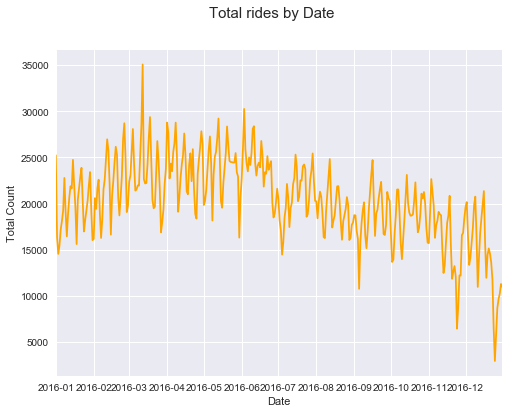

In [21]:
trips = Taxi.groupby(Taxi['date']).size()
trips.plot(kind='line', color = 'orange')
plt.xlabel("Date")
plt.ylabel("Total Count")
plt.suptitle('Total rides by Date', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

Now that we have the filtered dataframe, let's go back to the "Trip Miles" we were talking about one more time. We now sort the "Trip Miles" to find the top 10 distances travelled in Chicago. This shows that most rides were only for a distance of 0.1 miles. This was followed by 1.0 mile, closely followed by 1.1 miles. The top 15 also shows that most distances taken by riders was < 1.5 miles.

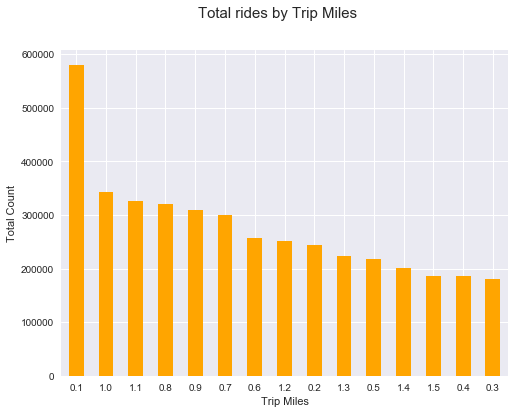

In [22]:
trip_dist = Taxi.groupby(Taxi['Trip Miles']).size().nlargest(15)
trip_dist.plot(kind='bar', rot = 0, color = 'orange')
plt.xlabel("Trip Miles")
plt.ylabel("Total Count")
plt.suptitle('Total rides by Trip Miles', size=15)
mpl.rcParams['figure.figsize'] = (8, 6)

Next, we find the top 10 Pickup and Dropoff Community Areas. To do that we group the dataframe by the Pickup and Dropoff Community Areas separately. On that we use the `size()` function which provides the size of each array (Community Area). Since Chicago has 77 Community Areas, we can restrict the bar graph to top 10 using the `nlargest()` function. We can edit the value 10 to anything of our liking. 
We can see from the graph that Near North Side (Community Area 8) has the highest pickup ~2.5M. O'Hare (Community Area 76) and Midway (Community Area 56) together have ~0.75M pickups.

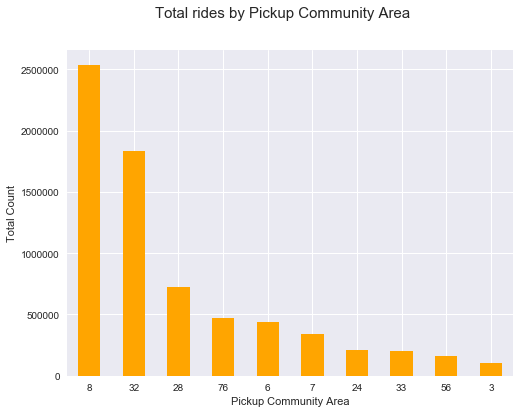

In [23]:
pick_com = Taxi.groupby('Pickup Community Area')
pick_com.size().nlargest(10).plot(kind='bar', rot = 0, color = 'orange') 
plt.xlabel("Pickup Community Area")
plt.ylabel("Total Count")
plt.suptitle('Total rides by Pickup Community Area', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

The top Dropoff Community Area is also Near North Side (~2.4M) whereas O'Hare has about ~0.3M taxi Dropoffs. 

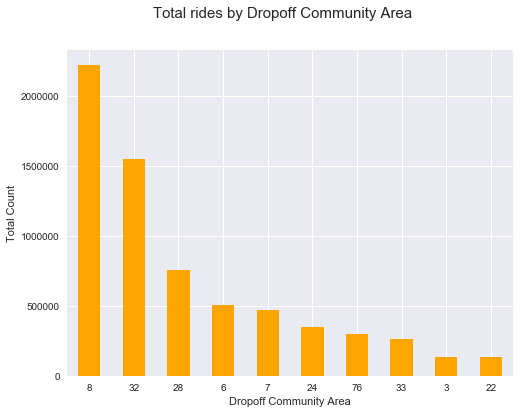

In [24]:
drop_com = Taxi.groupby('Dropoff Community Area')
drop_com.size().nlargest(10).plot(kind='bar', rot = 0, color = 'orange')
plt.xlabel("Dropoff Community Area")
plt.ylabel("Total Count")
plt.suptitle('Total rides by Dropoff Community Area', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

We next create a Heatmap to see if any inferences can be drawn when the Pickup and Dropoff Community Areas are brought together on a single map. We use seaborn heatmaps to perform this excercise. But before that can be done, we create a column called "count" and make all values in that column 1. We then use pivot table where the index is "Pickup Community Area" while the column is "Dropoff Community Area" and use the aggregate function sum where the value to be aggregated upon is the column "count". 
As seen from the above 2 graphs, Near North Side has the maximum Dropoff and Pickups (darkest color in this map). One reason for this can be that this is the shopping and tourist area of Chicago. Magnificient Mile, Navy Pier, Gold Coast, Goose Island all form part of Near North Side Community Area. This is followed by Pickup and Dropoff from / at the Loop (Community Area 32). Loop, being the business and office area of the city, this is understandable.  
Note: We can use .T in the heatmap function to transpose the Heatmap. We also use a few aesthetics here to make the map look better.

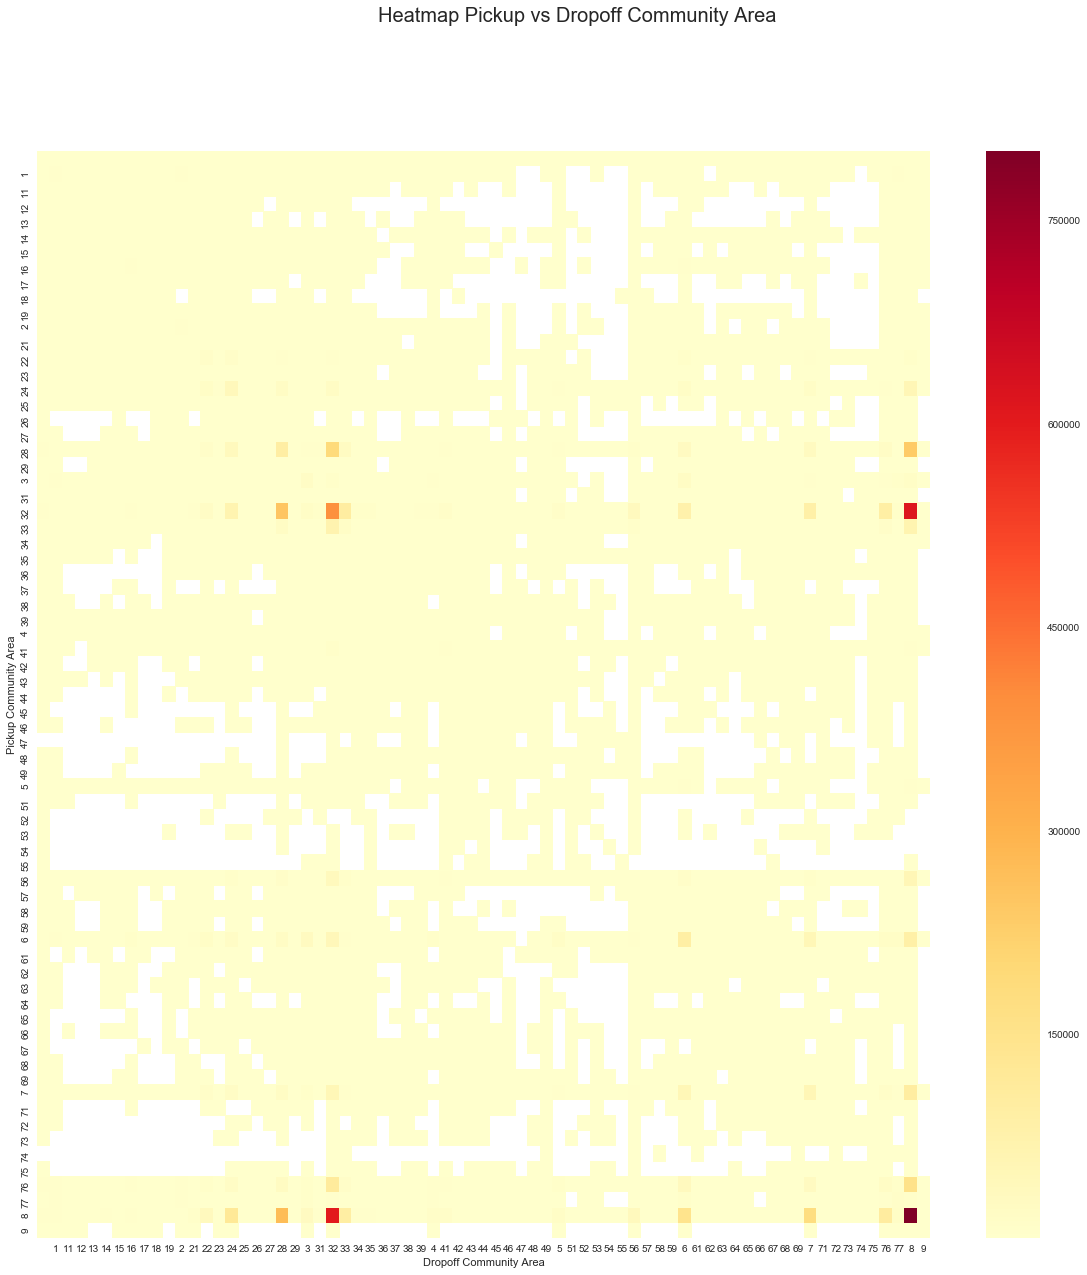

In [63]:
Taxi['count'] = 1
pvtdf = Taxi.pivot_table(values = 'count', index=['Pickup Community Area'], columns=['Dropoff Community Area'], 
                         aggfunc=np.sum)
fig, ax = plt.subplots()
ax.set_facecolor('white') # background color is white (by default it is light blue)
# Changed from set_axis_bgcolor as per the following warning:
# MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
sns.heatmap(pvtdf, cmap='YlOrRd', ax=ax)
plt.suptitle('Heatmap Pickup vs Dropoff Community Area', size=20)
mpl.rcParams['figure.figsize'] = (20.0, 20.0)

Now, let's plot the pickup locations using Pickup Centroid Lat Longs and type of graph as scatter. 
Plotting this, we can see the shape of Chicago coming up in the form of a map. 

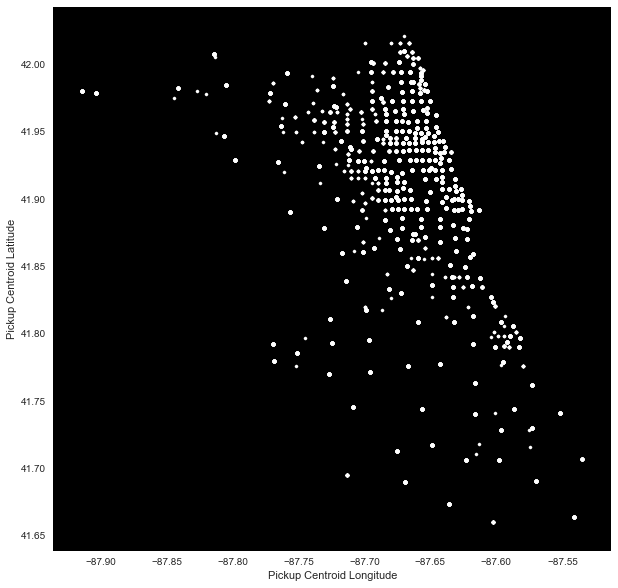

In [26]:
new_style = {'grid': False} #Remove grid  
mpl.rc('axes', **new_style)   
mpl.rcParams['figure.figsize'] = (10, 10)   
P=Taxi.plot(kind='scatter', x='Pickup Centroid Longitude', y='Pickup Centroid Latitude',color='white',s=10)
P.set_facecolor('black') #Background Color
# Changed from set_axis_bgcolor as per the following warning:
# MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.

Now that we have established the areas where the maximum pickup and dropoffs happen and plotted them to form a map as well, let's next see at which point in time (in this case, hour), the taxi's have the maximum pickup. 
`Groupby` function was used on the column "hour" to find this. 
As can be seen, the highest pickup is around 6:00 PM and 7:00 PM and the least pickup is at the wee hours of early morning 5:00 AM - 6:00 AM.

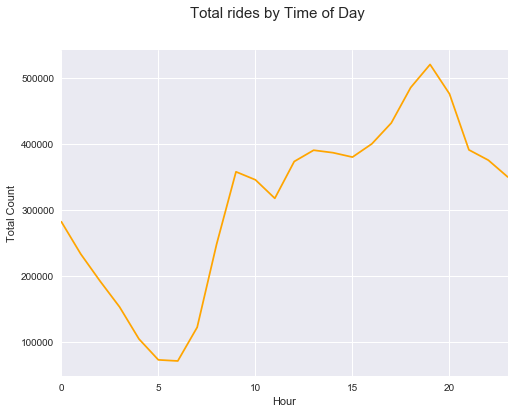

In [38]:
new_style_grid = {'grid': True} # Grid 
mpl.rc('axes', **new_style_grid)
pick_time = Taxi.groupby('hour')
pick_time.size().plot(kind='line', color = 'orange')
plt.xlabel("Hour")
plt.ylabel("Total Count")
plt.suptitle('Total rides by Time of Day', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

On an average the maximum pickups occured at Armour Square around 3:00 PM.

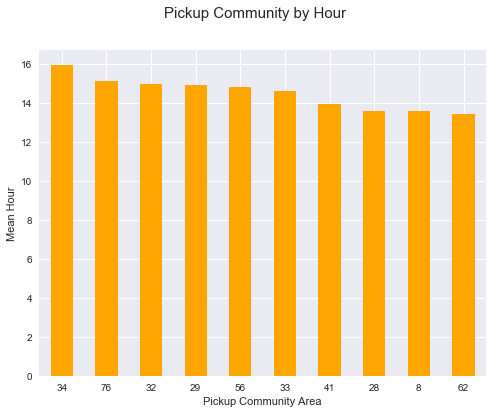

In [39]:
pick_ca_hr = Taxi.groupby('Pickup Community Area')
pick_ca_hr['hour'].mean().nlargest(10).plot(kind='bar', x='Pickup Community Area', rot = 0, color = 'orange')
plt.xlabel("Pickup Community Area")
plt.ylabel("Mean Hour")
plt.suptitle('Pickup Community by Hour', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

While the maximum dropoffs also occured at Armour Square around 3:00 PM.

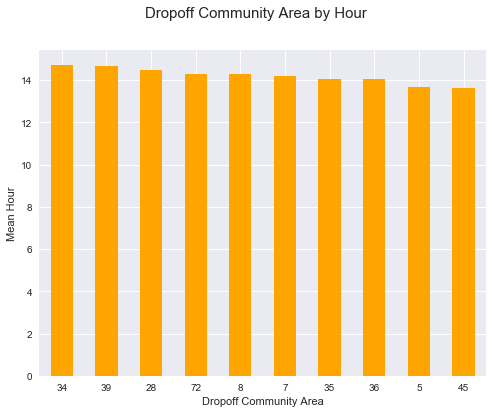

In [40]:
drop_ca_hr = Taxi.groupby('Dropoff Community Area')
drop_ca_hr['hour'].mean().nlargest(10).plot(kind='bar', x='Dropoff Community Area', rot = 0, color = 'orange')
plt.xlabel("Dropoff Community Area")
plt.ylabel("Mean Hour")
plt.suptitle('Dropoff Community Area by Hour', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

We now perform `groupby` on Weekday to find the count of rides taken on each day of the week.  
As can be seen, Friday has the maximum taxi rides (~1.2M) whereas Sunday/Monday have the lowest (~0.9M) over the course of the year.

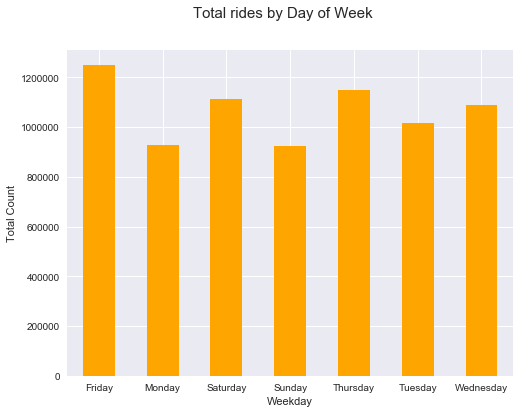

In [41]:
trip_day = Taxi.groupby('weekday')
trip_day.size().plot(kind='bar', rot = 0, color = 'orange')
plt.xlabel("Weekday")
plt.ylabel("Total Count")
plt.suptitle('Total rides by Day of Week', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

Talking about Weekdays, let's also find the weeks when the maximum taxi rides were taken in 2016. Since there are 52 weeks in a year, we can limit the plot to show only the top 15 weeks.  
We can see that the maximum rides were taken in June (Week 23, 24, 25), all appear in the top 10. Chicago saw one of the hottest summer temperatures in 2016. Temperature graph from [Accuweather](http://www.accuweather.com/en/us/chicago-il/60679/june-weather/525801_pc?monyr=6/1/2016&view=table)

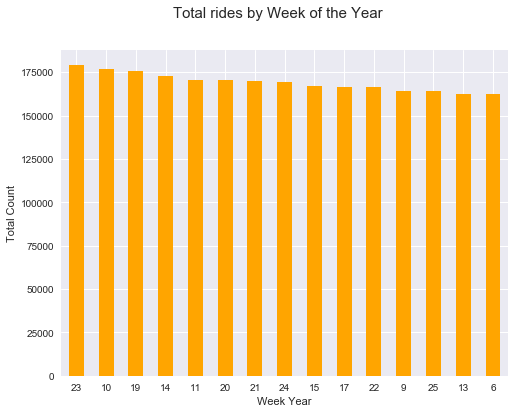

In [42]:
trip_week = Taxi.groupby('weekyr')
trip_week.size().nlargest(15).plot(kind='bar', rot = 0, color = 'orange')
plt.xlabel("Week Year")
plt.ylabel("Total Count")
plt.suptitle('Total rides by Week of the Year', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

Let's now perform some calculations on the various fares. The first one is Trip Total which includes
* Actual Fare
* Tips
* Tolls
* Extras  
Not surprising that since Friday has the maximum rides, the total trip fare is also the highest on Friday with close competition on Thursday as well (~20M) on each of these days in 2016.

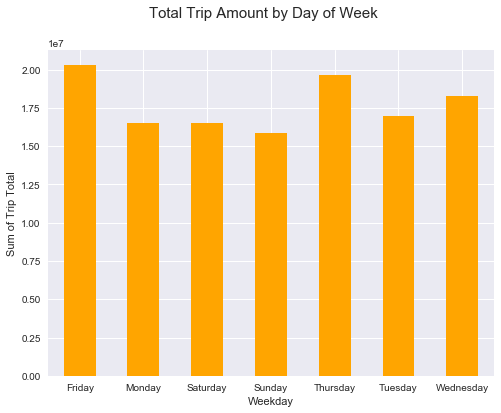

In [43]:
trip_amt_week = Taxi.groupby('weekday')
trip_amt_week['Trip Total'].sum().plot(kind='bar', x='weekday', rot = 0, color = 'orange')
plt.xlabel("Weekday")
plt.ylabel("Sum of Trip Total")
plt.suptitle('Total Trip Amount by Day of Week', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

But how do the riders mostly pay their fares? So, we group the data by "Payment Type" column.  
This shows us that the ~40% more amount is received by Credit Cards when compared to Cash Payments.

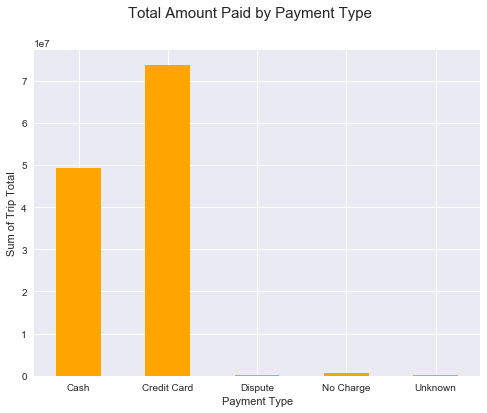

In [44]:
pay_type = Taxi.groupby('Payment Type')
pay_type['Trip Total'].sum().plot(kind='bar', x='Payment Type', rot = 0, color = 'orange')
plt.xlabel("Payment Type")
plt.ylabel("Sum of Trip Total")
plt.suptitle('Total Amount Paid by Payment Type', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

We now look at the mean fare paid by hour over the course of the year and interestingly though 5:00 - 6:00 a.m. had the lowest pickups, the average fare seems to be far higher than during the rest of the day!

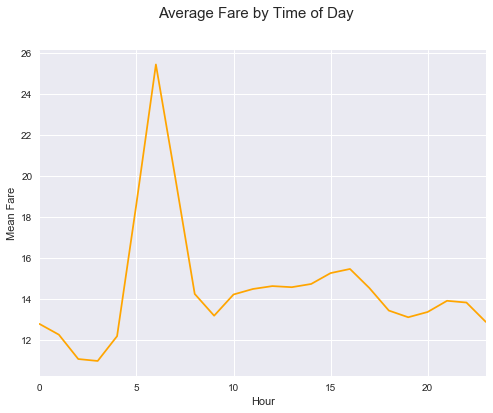

In [45]:
fare_time = Taxi.groupby('hour')
fare_time['Fare'].mean().plot(kind='line', x='hour', color = 'orange')
plt.xlabel("Hour")
plt.ylabel("Mean Fare")
plt.suptitle('Average Fare by Time of Day', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

Riders from O'Hare mostly get dropped off at Near North Side and The Loop according to the Heatmap. And the mean fare is highest for them.

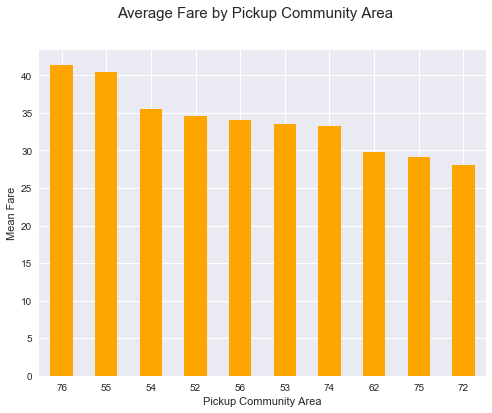

In [46]:
fare_ca = Taxi.groupby('Pickup Community Area')
fare_ca['Fare'].mean().nlargest(10).plot(kind='bar', x='Pickup Community Area', rot = 0, color = 'orange')
plt.xlabel("Pickup Community Area")
plt.ylabel("Mean Fare")
plt.suptitle('Average Fare by Pickup Community Area', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

Now coming to "Tips", we see that the maximum tip is paid by riders being picked up from the airports. Though the average for them is closer to $7. 

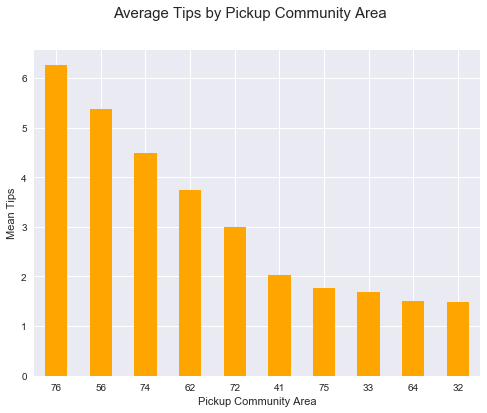

In [47]:
tip_ca = Taxi.groupby('Pickup Community Area')
tip_ca['Tips'].mean().nlargest(10).plot(kind='bar', x='Pickup Community Area', rot = 0, color = 'orange')
plt.xlabel("Pickup Community Area")
plt.ylabel("Mean Tips")
plt.suptitle('Average Tips by Pickup Community Area', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

Creating a scatter plot to see the amount paid as tip w.r.t. the total trip amount, shows a few linear lines. These slopped lines show that as the trip amount increases, the tip increases as well. We however see a few lines where the slope is '0' indicating that even if the fare increased, the tip remained the same.

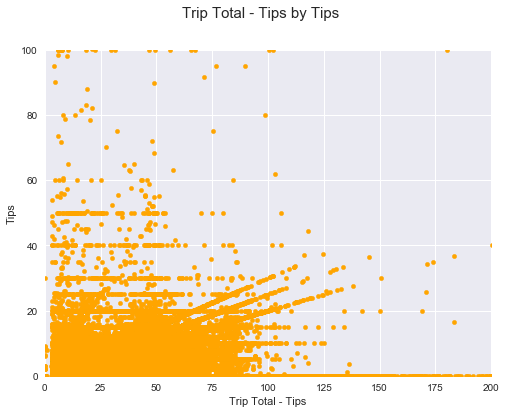

In [48]:
Taxi['x'] = Taxi['Trip Total'] - Taxi['Tips']
Taxi.plot(kind='scatter', x = 'x', y = 'Tips', xlim = (0,200), ylim = (0, 100), color = 'orange')
plt.xlabel("Trip Total - Tips")
plt.ylabel("Tips")
plt.suptitle('Trip Total - Tips by Tips', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

Let's now create a scatter plot to see how 'Trip Total' varies with 'Trip Miles'.

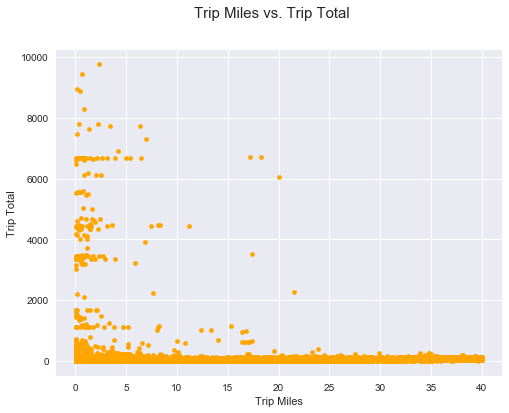

In [49]:
Taxi.plot(kind='scatter', x = 'Trip Miles', y = 'Trip Total', color = 'orange')
plt.xlabel("Trip Miles")
plt.ylabel("Trip Total")
plt.suptitle('Trip Miles vs. Trip Total', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

It is interesting to see that we have 'Trip Total' as large as 10,000. Let's restrict the Trip Total to < 200. We find 3 definite blocks of scatters which show that as the distance increases, the fare also increases.

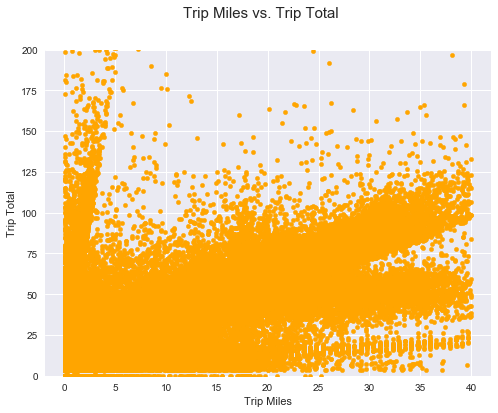

In [51]:
Taxi.plot(kind='scatter', x = 'Trip Miles', y = 'Trip Total', ylim = (0, 200), color = 'orange')
plt.xlabel("Trip Miles")
plt.ylabel("Trip Total")
plt.suptitle('Trip Miles vs. Trip Total', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

As we saw before, the maximum fare is paid during the wee hours of the day around 6:00 AM. The tips also show that the maximum tip is paid during these hours (6-7 AM).

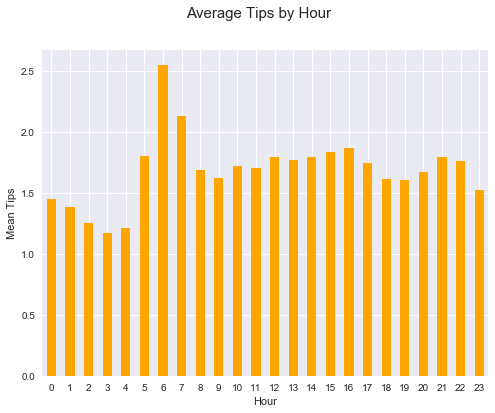

In [52]:
tip_hr = Taxi.groupby('hour')
tip_hr['Tips'].mean().plot(kind='bar', x='hour', rot = 0, color = 'orange')
plt.xlabel("Hour")
plt.ylabel("Mean Tips")
plt.suptitle('Average Tips by Hour', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

How about, how long did the trip last? To find that we use the "Trip Seconds" column and create a histogram. This shows that >1.2M lasted around 400 seconds (~6 minutes).

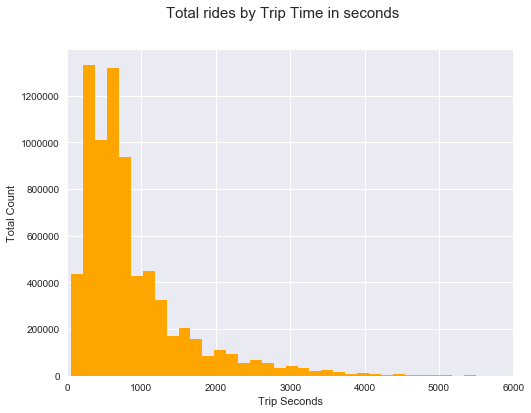

In [54]:
Taxi['Trip Seconds'].hist(bins = 500, color = 'orange')
plt.xlim(0, 6000)
plt.xlabel("Trip Seconds")
plt.ylabel("Total Count")
plt.suptitle('Total rides by Trip Time in seconds', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

The last one, was done to see if there is any particular taxi that has done trips way more than others. But the graph shows that there is not much of a starking difference between the top 10 taxis.

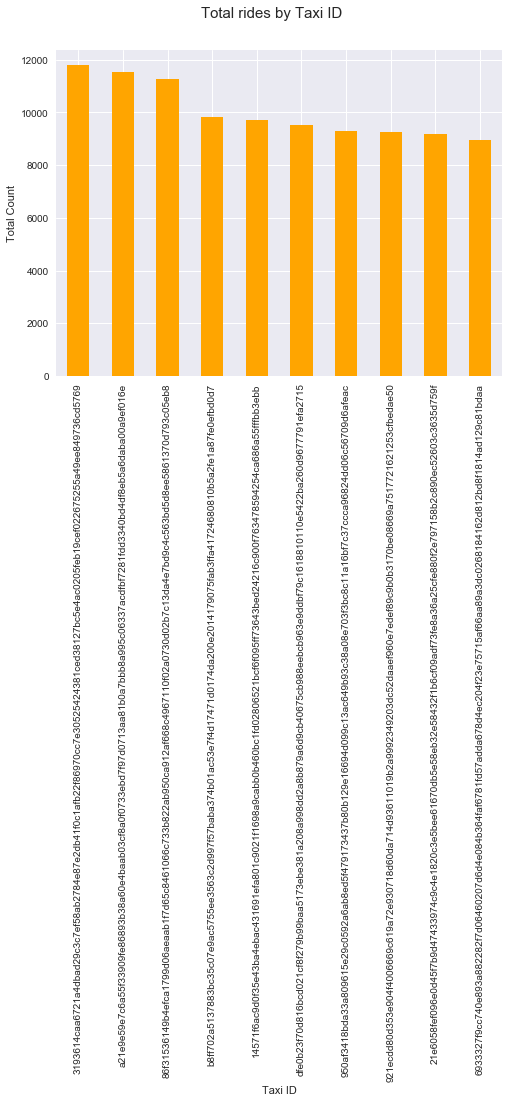

In [55]:
top_10_taxi = Taxi.groupby(Taxi['Taxi ID']).size().nlargest(10)
top_10_taxi.plot(kind='bar', color = 'orange')
plt.xlabel("Taxi ID")
plt.ylabel("Total Count")
plt.suptitle('Total rides by Taxi ID', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

Having done the above analysis, we use geopandas to create a simple choropleth map of Pick Up Community Areas. To do that we import the following libraries:
* fiona
* geopandas

In [56]:
import fiona
import geopandas as gpd

We used the Chicago Community Areas Boundaries file (https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6) and downloaded it as a geojson.  
Geopandas can read in shapefiles, geojson files etc. For more information on geopandas please visit http://geopandas.org/  
We also set the index to area_num_1 which is the Community Area Number.

In [57]:
ca = gpd.read_file("/Users/sayantani/Projects/Personal/ChiCABoundaries.geojson")
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.head()

,area_num_1,area,area_numbe,comarea,comarea_id,community,geometry,perimeter,shape_area,shape_len
0,35,0,35,0,0,DOUGLAS,(POLYGON ((-87.60914087617894 41.8446925026539...,0,46004621.1581,31027.0545098
1,36,0,36,0,0,OAKLAND,(POLYGON ((-87.59215283879394 41.8169293462668...,0,16913961.0408,19565.5061533
2,37,0,37,0,0,FULLER PARK,(POLYGON ((-87.62879823733725 41.8018930336891...,0,19916704.8692,25339.0897503
3,38,0,38,0,0,GRAND BOULEVARD,(POLYGON ((-87.6067081256125 41.81681377057218...,0,48492503.1554,28196.8371573
4,39,0,39,0,0,KENWOOD,(POLYGON ((-87.59215283879394 41.8169293462668...,0,29071741.9283,23325.1679062


A simple choropleth plot of the community areas based on the GeoJson file. At this stage, we have no data from the Taxi dataset.

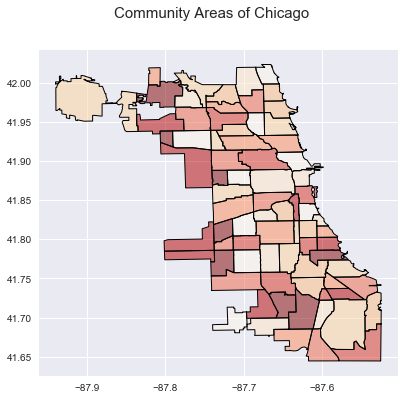

In [58]:
ca.plot(cmap='OrRd')
plt.suptitle('Community Areas of Chicago', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

If we go back, we can see that we populated a column called count while creating the heatmap using seaborn. We use the same column again to populate the number of taxis by Pickup Community Area. This data has to be converted to a dataframe so that we can merge it with the geodataframe (gdf) we created using geopandas. Here also, we change the index name to area_num_1 to avoid confusion with the gdf column name while merging.

In [59]:
ca_pick = Taxi.pivot_table(values='count', index='Pickup Community Area', aggfunc=np.sum)
capick = ca_pick.to_frame()
capick.columns=['count']
capick.index.names = ['area_num_1']
capick.reset_index(level=0, inplace=True)
capick.head()

,area_num_1,count
0,,9363
1,1,24062
2,11,13858
3,12,1092
4,13,2637


Now we join the pivoted Pickup Community Area data to the gdf. We also use fillna and set the value to 0 for all Nan values.

In [60]:
pickup_merge = ca.merge(capick, on='area_num_1', how='left')
pickup_merge.fillna(value = 0, inplace=True)
pickup_merge.head()

,area_num_1,area,area_numbe,comarea,comarea_id,community,geometry,perimeter,shape_area,shape_len,count
0,35,0,35,0,0,DOUGLAS,(POLYGON ((-87.60914087617894 41.8446925026539...,0,46004621.1581,31027.0545098,9151.0
1,36,0,36,0,0,OAKLAND,(POLYGON ((-87.59215283879394 41.8169293462668...,0,16913961.0408,19565.5061533,1430.0
2,37,0,37,0,0,FULLER PARK,(POLYGON ((-87.62879823733725 41.8018930336891...,0,19916704.8692,25339.0897503,424.0
3,38,0,38,0,0,GRAND BOULEVARD,(POLYGON ((-87.6067081256125 41.81681377057218...,0,48492503.1554,28196.8371573,3781.0
4,39,0,39,0,0,KENWOOD,(POLYGON ((-87.59215283879394 41.8169293462668...,0,29071741.9283,23325.1679062,10649.0


Then we create a plot with the column "count" as the variable and scheme "Jenks". 

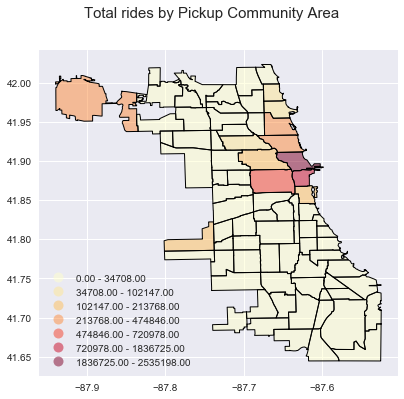

In [61]:
pickup_merge.plot(column='count', scheme='fisher_jenks', k=7, cmap='YlOrRd', legend=True)
plt.suptitle('Total rides by Pickup Community Area', size=15)
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

Having done all the above plots and analysis, there are still things I would like to add to this, viz.,
* Weather data
* US Holidays
* Population by community areas
* Income by community areas
* Air quality data

_Something that I find missing is the number of passengers for each ride._

A few credits before I end this iteration:
1. Daniel Forsyth: http://www.danielforsyth.me/mapping-nyc-taxi-data/
2. Drew Levitt: https://www.ocf.berkeley.edu/~dlevitt/2015/12/13/final-project-nyc-taxi-and-uber-data/
